In [0]:
import sklearn.datasets
import sklearn.linear_model
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


Text(0.5,1,'Original dataset')

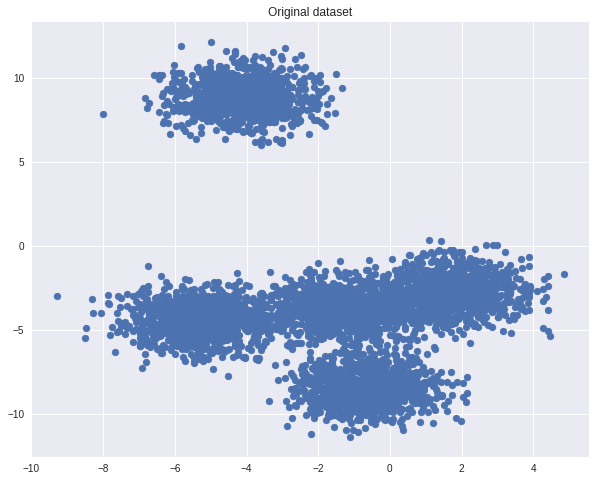

In [5]:
X,y=sklearn.datasets.make_blobs(5000,centers=5,cluster_std=1)

plt.scatter(X[:,0], X[:,1])
plt.title("Original dataset")

In [0]:
def kmeans(iters,k,X):
  
  cluster_indexes=np.zeros(X.shape[0])
  
  
  for iters in range(iters):
    l=np.zeros((k.shape[0],2))
    m=np.zeros(k.shape[0])
    for i in range(len(X)):

      kdis=np.sqrt(np.sum((k-X[i])**2,axis=1,keepdims=True))     # Distance of all points from the assumed centroids 
     
      cluster_indexi=np.argmin(kdis)                             # Index of the centroid from which distance is minimum
      cluster_indexes[i]=cluster_indexi                          # Updating nearest centroid index
      l[cluster_indexi]+=X[i]
      m[cluster_indexi]+=1
          
    for i in range(len(l)):                                      # If there are no points nearer to the centroid, leave as it is
      if m[i]!=0:
        l[i]=l[i]/m[i]
      else:
        l[i]=k[i]

    k=l[:]
      
        
  return(k,cluster_indexes)
  

In [0]:
# Cost is considered as the sum of the distances of all points from the centroids

def ComputeCost(k,clusters,X):
  a=0
  for i in range(len(X)):
    #print(clusters[i])
    a+=(X[i][0]-k[int(clusters[i])][0])**2+(X[i][1]-k[int(clusters[i])][1])**2
  
  return(a/len(X))

In [0]:
def main(iters,X):
  
  a=[min(X[:,0]),min(X[:,1])]
  b=[max(X[:,0]),max(X[:,1])]
  
  klist=[]
  costlist=[]
  cluster_indexesfinal=[]
  no_of_clusters=1
  max_no_of_clusters=10
  
  while no_of_clusters<max_no_of_clusters: # Verifying for all clusters less than 10 
    
    cost=10000000
    iter_for_each_cluster_number=5
    
    
    for no in range(iter_for_each_cluster_number):  # Iterating the process for a particular number of cluster (i.e. 4 times here)so that there is significantly
                         # less probability of getting stuck in a local minima.
      
      k=np.random.uniform(low=a,high=b,size=(no_of_clusters,2))  # Initialising random centers for every iteration for a particualr number of cluster
      kz,clust=kmeans(iters,k,X)
      costno=ComputeCost(kz,clust,X)
      
      if costno<cost:    # Selecting the iteration for which the cost is minimum
        cost=costno
        cluster_ind=clust
        kli=kz
      
      if no_of_clusters==1 :   # We don't need to check for local minima when we want to check for only one cluster.
        break
        
    costlist.append([cost,no_of_clusters])  # Appending number of clusters with the corresponding minimum cost
    cluster_indexesfinal.append(cluster_ind) # appending the final clustered indices for a specific number of cluster
    klist.append(kli) # appending final cluster centers
    
    no_of_clusters+=1
  
  costlist=np.array(costlist)  
  klist=np.array(klist)
  plt.plot(costlist[:,1],costlist[:,0])
  plt.xlabel("No of clusters")
  plt.ylabel("Cost function")
  plt.title("Elbow Method")
  
  
  return(costlist,cluster_indexesfinal,klist)
  

The elbow method signifies the point of elbow as the most probable number of clusters in which the data should be partitioned.

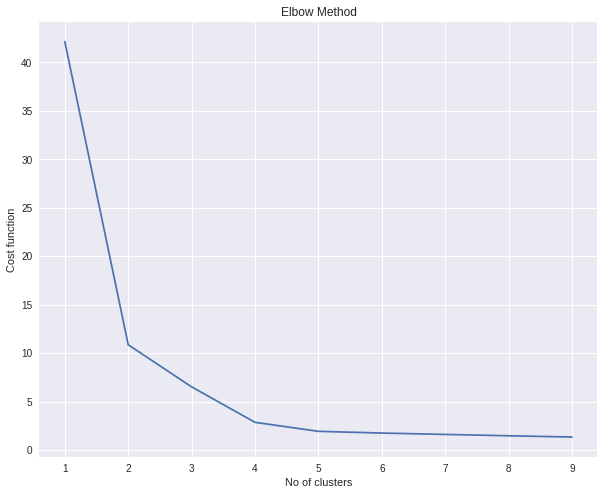

In [18]:
costlist,clusterlist,klist=main(10,X[:,:2])
#print(costlist)

If you are unsure of how many clusters the data should be partitioned in even by the Elbow Method, just visualize for all the probable number of clusters and check it.

How many clusters do you want? 4


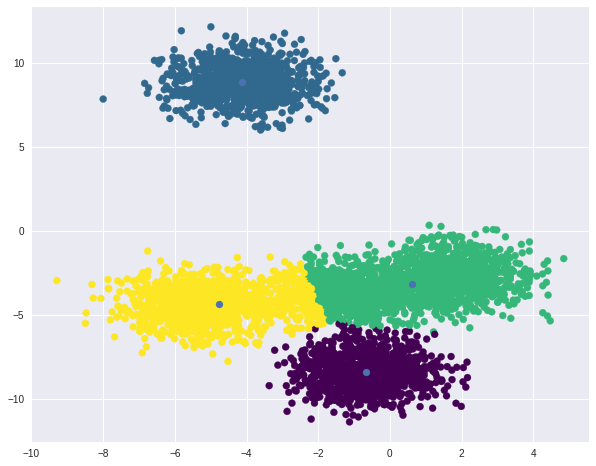

In [19]:
# For the given data you an see what are the best possible clusters for a given number of clusters


cluster=int(input("How many clusters do you want? "))-1
plt.scatter(X[:,0],X[:,1],c=np.array(clusterlist[cluster]),cmap=plt.cm.viridis)
plt.scatter(klist[cluster][:,0],klist[cluster][:,1],cmap=plt.cm.inferno)

How many clusters do you want? 5


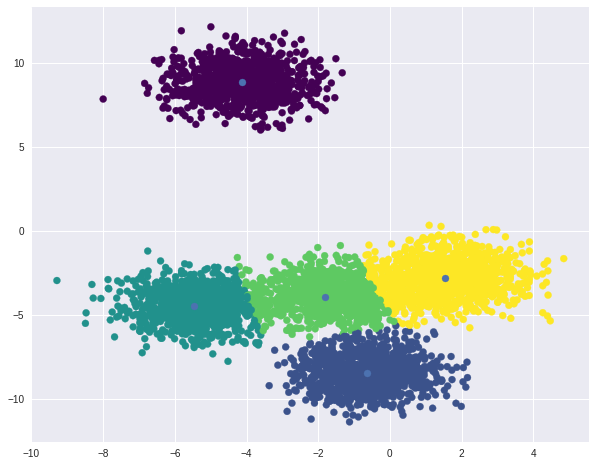

In [20]:
# For the given data you an see what are the best possible clusters for a given number of clusters


cluster=int(input("How many clusters do you want? "))-1
plt.scatter(X[:,0],X[:,1],c=np.array(clusterlist[cluster]),cmap=plt.cm.viridis)
plt.scatter(klist[cluster][:,0],klist[cluster][:,1],cmap=plt.cm.inferno)